----
# Laboratorium 3 - Zespolony szereg Fouriera
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów wydziału Informatyki i Telekomunikacji Politechniki Poznański

----
## 0 Zagadnienia do opanowania przed zajęciami:
---- 
### 0.1 Wyznaczanie współczynników zespolonego szeregu Fouriera
### 0.2 Zbieżność szeregu Fouriera
### 0.3 Efekt Gibbsa
*Literatura:*
- wykłady i ćwiczenia z przedmiotu Teoria Sygnałów
- R. Gabel, R. Robeerts, Sygnały i systemy liniowe, str. 181-197
- J. Izydorczyk, G. Płonka, G. Tyma, Teoria sygnałów, str. 1-19

### 0.4 Używanie języka Python, szczególnie biblioteki *sympy* w zakresie operacji całkowania oraz używania funkcji ekspotencjalnej, oraz funkcjonalności lambdify i Piecewise. Obsługa sympy w zakresie definiowania zmiennych i funkcji (sympy.symbol). 
- https://docs.sympy.org/latest/modules/integrals/integrals.html
- https://docs.sympy.org/latest/modules/functions/elementary.html#sympy-functions-elementary-exponential
- https://docs.sympy.org/latest/modules/utilities/lambdify.html
- https://docs.sympy.org/latest/modules/functions/elementary.html

### 0.5 Określanie wzoru funkcji w zadanym przedziale na podstawie jej wykresu.

In [2]:
%matplotlib inline
import sympy 
import numpy as np
import matplotlib.pyplot as plt 
import ipywidgets

----
## 1. Określanie wzorów funkcji
----
### Zadanie: Na podstawie poniższych wykresów określ wzór funkcji w odpowiednim zakresie wartości
<table><tr><td>
Funkcja A
<br>
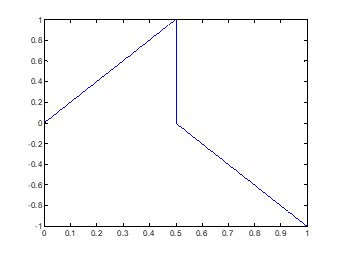
</td><td>
Funkcja B
<br>
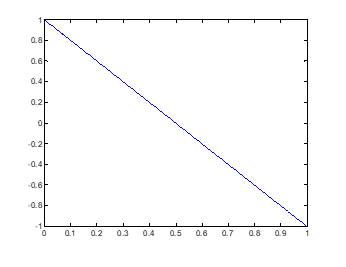
</td><td>
Funkcja C
<br>
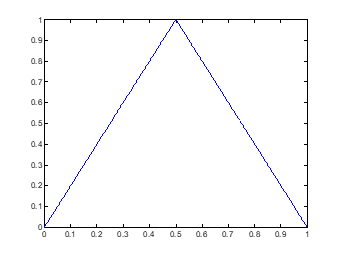
</td></tr><tr><td>
Funkcja D
<br>
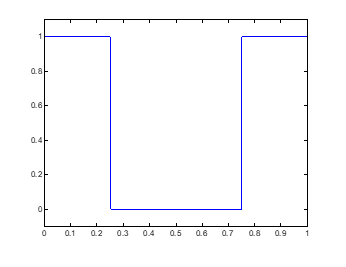
</td><td>
Funkcja E
<br>
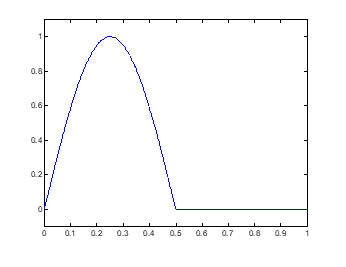
</td><td>
Funkcja F
<br>
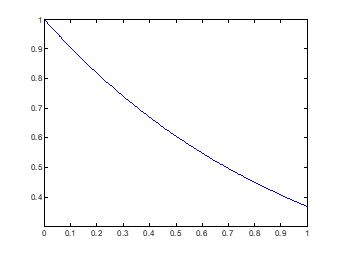
</td></tr>

----
## 2. Wyliczanie próbek funkcji
----
### Zadanie: Zdefiniuj wektor zawierający próbki jednego okresu badanej funkcji (składający się z przynajmniej 200 elementów). Wyświetl wyznaczone próbki na wykresie (matlplotlib). 
Definicje funkcji uzależnij od `T`.  
Podpowiedź: użyj `sympy.Piecewise` do zdefiniowania funkcji oraz `sympy.lambdify` 


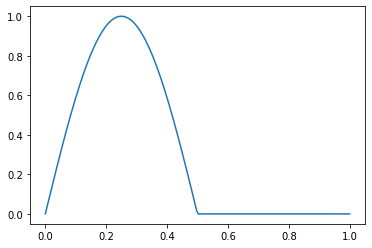

In [2]:
import sympy 
import numpy as np
import matplotlib.pyplot as plt 

#declare symbolic variable t (time) and period (T=1)
t = sympy.Symbol('t', real = 'True', nonzero = 'True') 
T = 1

#declare functions (fA, fB, ... fF)
fA=sympy.Piecewise((2*t/T,t<=T/2),(1-2*t/T,t>T/2))
fB=-1*t+1
fC=sympy.Piecewise((2*t/T,t<=T/2),(2-2*t/T,t>T/2))
fD=sympy.Piecewise((1,t<= T/4),(0,(t>T/4)&(t<=3*T/4)),(1,t>3*T/4))
fE=sympy.Piecewise((sympy.sin(2*sympy.pi*t),t<=T/2),(0,t > T/2))
fF=sympy.exp(-1*t)

#select one funcoion
currFun = fE

#plot the selected function
NumberOfSamples = 200
fun=sympy.lambdify(t,currFun,'numpy')
lin=np.linspace(0, T, NumberOfSamples)
x=fun(lin)
plt.plot(lin,x)


----
## 3. Wyznaczanie współczynników szeregu Fouriera (analityczne)
----
### Zadanie: Na podstawie wyznaczonych wzorów funkcji znajdź rozwinięcie funkcji w szereg Fouriera. Skorzystaj z biblioteki sympy w środowisku Python. 
- Jakie założenie należy przyjąć przy wyznaczaniu współczynników szeregu Fouriera ?

$$ f(t) = \sum_{k=-\infty}^{\infty} F_k e^{j k {{2 \pi } \over T } t} \text{   for:   } k \in \mathbb{C} $$ 

$$ F_0 = { 1 \over T } \int\limits_{-{T \over 2}}^{{T \over 2}}f(t)dt  $$

$$ F_k = { 1 \over T } \int\limits_{-{T \over 2}}^{{T \over 2}} f(t) e^{-jkt {2\pi \over T}} dt \text{   for:   } k \in \mathbb{C}, k \neq 0 $$

Podpowiedź: funkcje `sympy.exp`, `sympy.simplify`, `sympy.integrate`

function(f)


Piecewise((sin(2*pi*t), t <= 0.5), (0, True))

function(f)


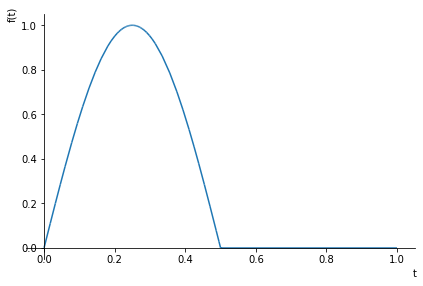

F0


1.0/pi

Fk


1.0*Piecewise((-1/(2*pi*k**2*exp(1.0*I*pi*k) - 2*pi*exp(1.0*I*pi*k)) - 1/(2*pi*k**2 - 2*pi), Ne(k, 1)), (0.25*I*exp(-1.0*I*pi), True))

Fk+simplyfy


Piecewise((-0.5*((-1)**k + 1)/(pi*(k**2 - 1)), Ne(k, 1)), (-0.25*I, True))

In [3]:
#declare symbolic variable k
k = sympy.Symbol('k', real = 'True', nonzero=True, positive=True, integer=True)

def determineFourierCoefficients(Function, RangeBeg, RangeEnd, DisplayCoeffs=True):
    #declare kernel
    Kernel=sympy.exp((-sympy.I*2*k*sympy.pi*t)/T)
    Function=Function.rewrite(sympy.Piecewise)
    print("function(f)"); display(Function)
    print("function(f)"); sympy.plot(Function,(t,RangeBeg,RangeEnd))
    
    #determine F0
    F0=1/T*sympy.integrate(Function,(t,RangeBeg,RangeEnd))
    print("F0"); display(F0)
    
    #determine Fk
    Fk=1/T*sympy.integrate(Function*Kernel,(t,RangeBeg,RangeEnd))
    print("Fk"); display(Fk)
    print("Fk+simplyfy"); display(Fk.simplify())
    
    return F0, Fk

F0, Fk = determineFourierCoefficients(currFun, 0, T)

----
## 4. Wyznaczanie wartości pierwszych 10 współczynników szeregu Fouriera
---- 
Zadanie: Wygeneruj wektor zawierający 10 pierwszych współczynników szeregu Fouriera

Podpowiedz: wykorzystaj funkcje z poprzednich zadań, pamiętaj że współczynniki zespolonego szeregu Fouriera należą do zbioru liczb **ZESPOLONYCH** (użyj odpowiedniego typu danych - `np.cdouble`)

In [4]:
#create array containing calculated coefficients
import numpy as np
coeffF0=np.array(F0,dtype=np.cdouble)
coeffFk=np.cdouble(sympy.lambdify(k,Fk,'numpy')(np.arange(1,15)))
coeff=np.append(coeffF0,coeffFk) #łączy fo i fk w jeden wektor 10 elementowy

#print array content
for ki, iFk in enumerate(coeff):
        print("F{} = {}".format(ki,iFk.round(15)))



F0 = (0.318309886183791+0j)
F1 = -0.25j
F2 = (-0.106103295394597-0j)
F3 = 0j
F4 = (-0.021220659078919-0j)
F5 = 0j
F6 = (-0.00909456817668-0j)
F7 = 0j
F8 = (-0.005052537875933-0j)
F9 = 0j
F10 = (-0.003215251375594-0j)
F11 = 0j
F12 = (-0.002225943260027-0j)
F13 = -0j
F14 = (-0.001632358390686-0j)


<lambdifygenerated-2>:2: RuntimeWarning: divide by zero encountered in true_divide
  return (1.0*select([not_equal(k, 1),True], [-1/(2*pi*k**2*exp(1.0*1j*pi*k) - 2*pi*exp(1.0*1j*pi*k)) - 1/(2*pi*k**2 - 2*pi),0.25*1j*exp(-1.0*1j*pi)], default=nan))
<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in true_divide
  return (1.0*select([not_equal(k, 1),True], [-1/(2*pi*k**2*exp(1.0*1j*pi*k) - 2*pi*exp(1.0*1j*pi*k)) - 1/(2*pi*k**2 - 2*pi),0.25*1j*exp(-1.0*1j*pi)], default=nan))


----
## 5. Rekonstrukcja sygnału
----
Wykorzystując klasę `xInteractiveFourier` oraz metody `xInteractiveFourier.complexFourierSeries` oraz `xInteractiveFourier.createDemo` zaobserwuj proces proces kolejnego przybliżania sygnału sumą początkowych wyrazów przebiegu. Zwróć uwagę na błędy aproksymacji występujące w ewentualnych punktach nieciągłości oraz przeanalizuj zależność błędu średniokwadratowego i maksymalnego od liczby składników szeregu. 

Funkcja `xInteractiveFourier.complexFourierSeries` jako argumenty przyjmuje: F0 - wartość współczynnika F0, Fk - wyrażenie na współczynniki fk, Samples - próbki aproksymowanej funkcji, rangeStart - minimalny argument aproksymowanej funkcji, rangeStop - maksymalny argument aproksymowanej funkcji. 

Następnie sprawdz, jak wyglądają przebiegi aproksymowane z uzyciem współczynników szeregu, które niosą jedynie informacje o amlitudzie $abs(fk)$ oraz zwpółczynników które niosą tylko informację o fazie $e^{j\phi}$. W tym celu dodaj "mag" lub "phase" jako dodatkowy argument funkcji `complexFourierSeries`.

function(f)


Piecewise((sin(2*pi*t), t <= 0.5), (0, True))

function(f)


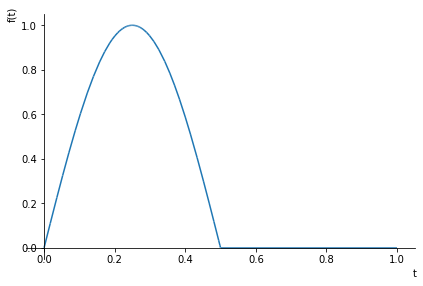

F0


1.0/pi

Fk


1.0*Piecewise((-1/(2*pi*k**2*exp(1.0*I*pi*k) - 2*pi*exp(1.0*I*pi*k)) - 1/(2*pi*k**2 - 2*pi), Ne(k, 1)), (0.25*I*exp(-1.0*I*pi), True))

Fk+simplyfy


Piecewise((-0.5*((-1)**k + 1)/(pi*(k**2 - 1)), Ne(k, 1)), (-0.25*I, True))

<lambdifygenerated-4>:2: RuntimeWarning: divide by zero encountered in true_divide
  return (1.0*select([not_equal(k, 1),True], [-1/(2*pi*k**2*exp(1.0*1j*pi*k) - 2*pi*exp(1.0*1j*pi*k)) - 1/(2*pi*k**2 - 2*pi),0.25*1j*exp(-1.0*1j*pi)], default=nan))
<lambdifygenerated-4>:2: RuntimeWarning: invalid value encountered in true_divide
  return (1.0*select([not_equal(k, 1),True], [-1/(2*pi*k**2*exp(1.0*1j*pi*k) - 2*pi*exp(1.0*1j*pi*k)) - 1/(2*pi*k**2 - 2*pi),0.25*1j*exp(-1.0*1j*pi)], default=nan))


interactive(children=(IntSlider(value=1, description='NumberOfCoefficients', layout=Layout(width='100%'), max=…

In [5]:
from xInteractiveFourier import *

FigSize      = (16, 10)
MaxNumCoeffs = 20  #max num coeff used for demo

F0, Fk  = determineFourierCoefficients(currFun, 0, T, DisplayCoeffs=False)
Samples = sympy.lambdify(t, currFun, 'numpy')(np.linspace(0, T, NumberOfSamples))

InteractiveFourier = xInteractiveFourier(MaxNumCoeffs)
InteractiveFourier.complexFourierSeries(F0, Fk, Samples, 0, T)
Demo = InteractiveFourier.createDemo(FigSize)
Demo

----
## 6. Zadania dodatkowe
----
### Zadanie 6.1
Dla wyznaczonych funkcji z zadania 1 wyznacz wyrażenia na współczynniki zespolonego szeregu Fouriera w sposób analityczny i porównaj wyniki. 

### Zadanie 6.2
Wykonaj polecenia z zadań C, D i E dla trygonometrycznego szeregu Fouriera (wzory z wykładu/literatury). Zmodyfikuj funkcję $complexFourierSeries$ lub zbuduj na jej podstawię funkcję rekonstruującą sygnał na podstawie podanych wyrażeń na współczynniki a1, ak i bk. Porównaj otrzymane aproksymacje dla trygonometrycznego i zespolonego szeregu Fouriera. 